In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [25]:
train_data = '/kaggle/input/dogs-vs-cats/train'
test_data = '/kaggle/input/dogs-vs-cats/test'

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout



In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
   
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
   
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [28]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(1,activation = 'sigmoid'))


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:

history = model.fit(train_ds,epochs=10,validation_data = valid_ds)

Epoch 1/10
  2/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.4297 - loss: 6.0481  

W0000 00:00:1723393775.681882     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5339 - loss: 4.0341

W0000 00:00:1723393818.688843     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.5339 - loss: 4.0308 - val_accuracy: 0.5330 - val_loss: 0.6798
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.5675 - loss: 0.6889 - val_accuracy: 0.5044 - val_loss: 0.6967
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.5957 - loss: 0.6743 - val_accuracy: 0.6718 - val_loss: 0.6155
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6401 - loss: 0.6352 - val_accuracy: 0.7132 - val_loss: 0.5659
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.6968 - loss: 0.5579 - val_accuracy: 0.7708 - val_loss: 0.4797
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7190 - loss: 0.5148 - val_accuracy: 0.7832 - val_loss: 0.4493
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7672 - loss: 0.4668 - val_accuracy: 0.7912 - val_loss: 0.4597
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8027 - loss: 0.4119 - val_accurac

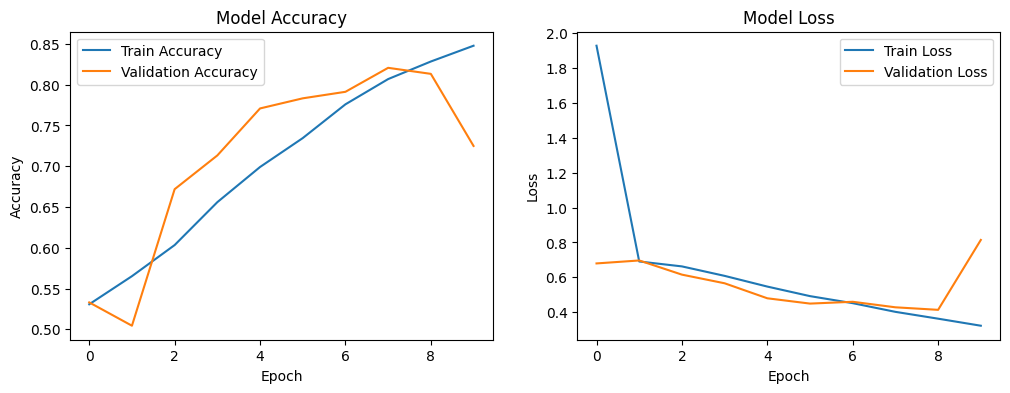

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


In [69]:
import cv2

In [77]:
test_img= cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.10010.jpg')

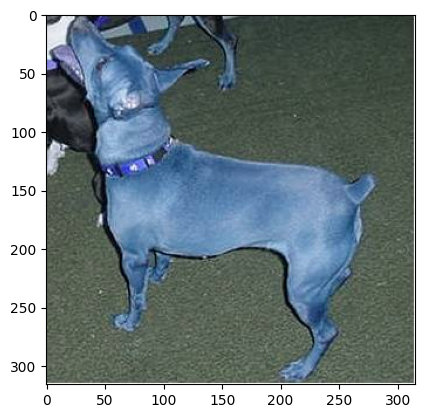

In [78]:
plt.imshow(test_img)

In [79]:
test_img.shape

(316, 315, 3)

In [80]:
test_img = cv2.resize(test_img,(256,256))

In [81]:
test_img.shape

(256, 256, 3)

In [82]:
test_input = test_img.reshape((1,256,256,3))

In [83]:
test_input.shape

(1, 256, 256, 3)

In [84]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.]], dtype=float32)